###목표
- 사전 로컬환경에서 만들어둔 npz파일을 불러와서 신경망에 넣어 예측, 학습해보자

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data = np.load('/content/drive/MyDrive/sw캠프 데이터 비즈니스 과정/data/animals.npz')

In [13]:
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((960, 224, 224, 3), (240, 224, 224, 3), (960,), (240,))

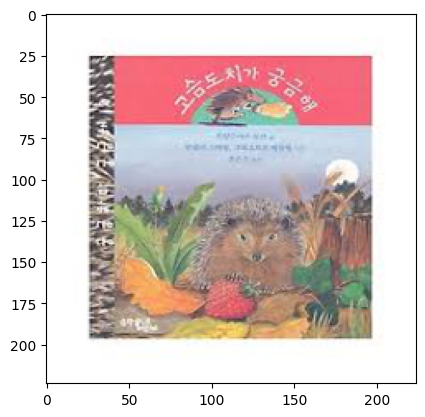

In [ ]:
plt.imshow(X_train[1])

In [ ]:
X_train[3]
# 가장 내부 배열은 R,G,B값에 따른 각각의 수치값들(세개의 수치로 하나의 픽셀의 색상을 최종결정)
# 그 다음 배열은 가로 한줄의 픽셀값
# 최종 배열은 이미지 전체의 픽셀들을 표

array([[[ 12,   0,   2],
        [ 13,   0,   2],
        [ 15,   0,   2],
        ...,
        [ 60,  20,  32],
        [ 67,  30,  38],
        [ 38,   5,   9]],

       [[ 12,   0,   2],
        [ 13,   0,   2],
        [ 15,   0,   2],
        ...,
        [ 57,  23,  33],
        [ 64,  32,  38],
        [ 33,   5,   8]],

       [[ 12,   0,   2],
        [ 13,   0,   2],
        [ 15,   0,   2],
        ...,
        [ 52,  26,  32],
        [ 57,  35,  37],
        [ 26,   6,   8]],

       ...,

       [[166, 145,  90],
        [167, 146,  91],
        [169, 148,  93],
        ...,
        [176, 147,  81],
        [173, 144,  76],
        [173, 144,  76]],

       [[164, 143,  88],
        [164, 143,  88],
        [166, 145,  90],
        ...,
        [176, 146,  80],
        [173, 144,  76],
        [173, 144,  76]],

       [[162, 141,  86],
        [162, 141,  86],
        [164, 143,  88],
        ...,
        [175, 146,  80],
        [173, 144,  76],
        [173, 144,  76]]

###색의 가산혼합
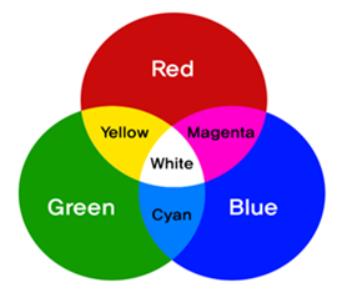

MLP로 분류

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
model = Sequential()

model.add(Flatten(input_shape =(224, 224, 3)))

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(3, activation='softmax'))

In [ ]:
# sparse_categorical_crossentropy : 정답의 원핫 인코딩까지 같이 지원
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [ ]:
h = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
6/6 [==============================] - 8s 134ms/step - loss: 10057.9697 - acc: 0.3490 - val_loss: 5819.1235 - val_acc: 0.3125
Epoch 2/20
6/6 [==============================] - 0s 56ms/step - loss: 10071.8164 - acc: 0.2891 - val_loss: 8294.0713 - val_acc: 0.3125
Epoch 3/20
6/6 [==============================] - 0s 58ms/step - loss: 5950.9243 - acc: 0.3555 - val_loss: 1388.5133 - val_acc: 0.3125
Epoch 4/20
6/6 [==============================] - 0s 56ms/step - loss: 1590.4039 - acc: 0.3229 - val_loss: 2283.0408 - val_acc: 0.3125
Epoch 5/20
6/6 [==============================] - 0s 46ms/step - loss: 3243.5681 - acc: 0.3411 - val_loss: 609.9917 - val_acc: 0.3646
Epoch 6/20
6/6 [==============================] - 0s 46ms/step - loss: 2149.8069 - acc: 0.3503 - val_loss: 3438.7109 - val_acc: 0.3229
Epoch 7/20
6/6 [==============================] - 0s 41ms/step - loss: 2508.5220 - acc: 0.3216 - val_loss: 2559.3435 - val_acc: 0.3385
Epoch 8/20
6/6 [==============================] - 0s 

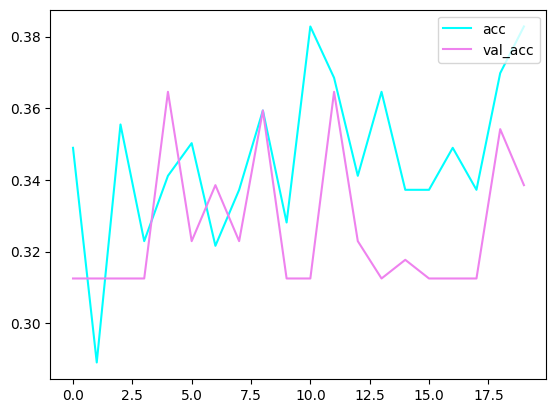

In [ ]:
plt.plot(h.history['acc'], label='acc',color='cyan')
plt.plot(h.history['val_acc'], label='val_acc',color='violet')
plt.legend(loc='upper right')
plt.show()

In [9]:
# 정확도 외에 정밀도, 재현율, F!스코어 까지 확인
from sklearn.metrics import classification_report

In [ ]:
pre = model.predict(X_test)
pre

8/8 [==============================] - 0s 7ms/step


array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [4.0088606e-24, 1.0000000e+00, 0.0000000e+00],
       [1.2123987e-05, 9.9998784e-01, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 5.6146580e-21, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.0997275e-37, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.000

In [ ]:
# argmax : 가장 큰값의 인덱스를 변환해주는 함수
# axis=1 : 예측값이 2차원 배열이므로 열방향(좌->우)인 값들 중에서 비교하겠다는 뜻
np.argmax(pre, axis=1)

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0,
       0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1,
       1, 2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 1, 1])

In [ ]:
print(classification_report(y_test, np.argmax(pre,axis=1)))
# support : 데이터의 개수
# pre 값이 각 클래스에 대한 확률로 나오기 떄문에 그 중 가장 높은 값의 인덱스와 실제 정답을 비교하는 방식

              precision    recall  f1-score   support

           0       0.33      0.72      0.45        79
           1       0.34      0.17      0.23        80
           2       0.19      0.06      0.09        81

    accuracy                           0.32       240
   macro avg       0.29      0.32      0.26       240
weighted avg       0.29      0.32      0.26       240



기존 MLP로는 3채널의 컬러이면서 배경이 전부 다른 다양한 이미지들을 분류하는데 어려움이 있음

CNN 모델링

In [8]:
from tensorflow.keras.layers import Conv2D, MaxPool2D

In [ ]:
cnn_model = Sequential()

# 1. 특성추출부(Conv - 특징이 되는 정보를 추출)
# filters : 필터의 개수
# kernel_size: 필터의 크기
# padding = 'same' : 원본데이터의 크기에 맞춰 알아서 패딩을 적용 (valid: 패딩적용x)
cnn_model.add(Conv2D(input_shape=(224,224,3), filters=128, kernel_size=(3,3), padding='same', activation='relu'))

# 2. 특성추출부(Pooling - 불필요한 정보를 삭제)
# pool_size : 디폴트 값은 (2x2)
cnn_model.add(MaxPool2D())

cnn_model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
cnn_model.add(MaxPool2D())

cnn_model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
cnn_model.add(MaxPool2D())

cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
cnn_model.add(MaxPool2D())

# 3. MLP(분류기)
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(16, activation='relu'))
cnn_model.add(Dense(3, activation='softmax'))

cnn_model.summary()

# cnn층 파라미터 수 계산
# 필터 크기(가로+세로+입력데이터의 채널수) + 필터개수 + 필터개수(b)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 256)     295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       295040    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [ ]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['acc'])
cnn_model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=128)

In [ ]:
pre = cnn_model.predict(X_test)
print(classification_report(y_test, np.argmax(pre,axis=1)))

CNN 신경망이지만 직접 만든 모델로 한번에 좋은 결과를 얻기는 힘들다

###VGG16 모델

In [5]:
from tensorflow.keras.applications import VGG16

In [ ]:
pre_trained_model = VGG16(input_shape=(224,224,3), include_top=False, weights='imagenet')
# include_top=False : 불러온 사전학습모델의 MLP층을 사용하지 않고 특성추출부만 사용(=특성추출방식)
# weights='imagenet' : 이미지넷 챌린지 대회에서 학습된 가중치(w)를 그대로 사용

In [ ]:
pre_trained_model.summary()

In [ ]:
cnn_model2 = Sequential()

cnn_model2.add(pre_trained_model)
cnn_model2.add(Flatten())
cnn_model2.add(Dense(256, activation='relu'))
cnn_model2.add(Dense(128, activation='relu'))
cnn_model2.add(Dense(32, activation='relu'))
cnn_model2.add(Dense(3, activation='softmax'))

cnn_model2.summary()

In [ ]:
cnn_model2.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [ ]:
cnn_model2.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=256)

In [ ]:
pre = cnn_model2.predict(X_test)
print(classification_report(y_test, np.argmax(pre, axis=1)))

In [10]:
# 미세조정방식(우리 데이터에 맞게 일부 층들을 재학습 시키는 방식)
pre_trained_model2 = VGG16(input_shape=(224,224,3), include_top=False, weights='imagenet')

58889256/58889256 [==============================] - 2s 0us/step


In [11]:
# 특성추출부 층들의 명칭을 출력
for layer in pre_trained_model2.layers:
  print(layer.name)

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [12]:
for layer in pre_trained_model2.layers:
  if layer.name == 'block5_conv3':
    layer.trainable = True
  else:
    layer.trainable = False

In [13]:
cnn_model3 = Sequential()

cnn_model3.add(pre_trained_model2)
cnn_model3.add(Flatten())
cnn_model3.add(Dense(256, activation='relu'))
cnn_model3.add(Dense(128, activation='relu'))
cnn_model3.add(Dense(32, activation='relu'))
cnn_model3.add(Dense(3, activation='softmax'))

cnn_model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               6422784   
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 3)                 99        
                                                                 
Total params: 21,174,595
Trainable params: 8,819,715
N

In [14]:
cnn_model3.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['acc'])
cnn_model3.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=256)

Epoch 1/20
3/3 [==============================] - 74s 22s/step - loss: 45.0247 - acc: 0.4167 - val_loss: 5.9253 - val_acc: 0.4062
Epoch 2/20
3/3 [==============================] - 4s 2s/step - loss: 2.7071 - acc: 0.5404 - val_loss: 0.9593 - val_acc: 0.4844
Epoch 3/20
3/3 [==============================] - 4s 1s/step - loss: 0.6169 - acc: 0.6719 - val_loss: 0.7187 - val_acc: 0.5729
Epoch 4/20
3/3 [==============================] - 4s 2s/step - loss: 0.4567 - acc: 0.8125 - val_loss: 0.6204 - val_acc: 0.6667
Epoch 5/20
3/3 [==============================] - 4s 2s/step - loss: 0.3199 - acc: 0.9049 - val_loss: 0.5197 - val_acc: 0.7969
Epoch 6/20
3/3 [==============================] - 4s 1s/step - loss: 0.1921 - acc: 0.9479 - val_loss: 0.5253 - val_acc: 0.8177
Epoch 7/20
3/3 [==============================] - 4s 2s/step - loss: 0.1073 - acc: 0.9792 - val_loss: 0.5743 - val_acc: 0.8177
Epoch 8/20
3/3 [==============================] - 4s 2s/step - loss: 0.0559 - acc: 0.9844 - val_loss: 0.6307

In [15]:
pre = cnn_model3.predict(X_test)
print(classification_report(y_test, np.argmax(pre, axis=1)))

8/8 [==============================] - 8s 458ms/step
              precision    recall  f1-score   support

           0       0.87      0.82      0.84        79
           1       0.73      0.88      0.80        80
           2       0.87      0.74      0.80        81

    accuracy                           0.81       240
   macro avg       0.82      0.81      0.81       240
weighted avg       0.82      0.81      0.81       240



### 데이터 증강(Data Augmentation)
- 모델의 과대적합을 방지하기 위한 방법 중 하나로 훈련 데이터를 더 늘려주는 기법

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# ImageDataGenerator : 이미지 데이터를 생성하기 위한 조건을 설정해주는 함수
aug = ImageDataGenerator(
    rotation_range = 30,     # 이미지 회전 각도(30도 내외로 회전)
    width_shift_range = 0.2, # 20% 내외 수평이동
    height_shift_range=0.2,  # 20% 내외 수직이동
    zoom_range=0.2,          # 0.8~1.2배로 축소/확대
    horizontal_flip=True,    # 수평방향으로 뒤집기
    fill_mode='nearest'      # 이미지가 변형되면서 비는 공간을 가장 근처의 픽셀로 채워주기
    )

In [6]:
pre_trained_model3 = VGG16(input_shape=(224,224,3), include_top=False, weights='imagenet')

for layer in pre_trained_model3.layers:
  if layer.name == 'block5_conv3':
    layer.trainable = True
  else:
    layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [14]:
cnn_model4 = Sequential()

cnn_model4.add(pre_trained_model3)
cnn_model4.add(Flatten())
cnn_model4.add(Dense(256, activation='relu'))
cnn_model4.add(Dense(128, activation='relu'))
cnn_model4.add(Dense(32, activation='relu'))
cnn_model4.add(Dense(3, activation='softmax'))

cnn_model4.summary()

cnn_model4.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
Total params: 21,174,595
Trainable params: 8,819,715
Non

In [ ]:
# flow : ImageDataGenerator로 설정한 조건을 통해 이미지를 실제로 생성해서 학습에 넣어주는 함수
cnn_model4.fit(X_train, y_train, epochs=50, batch_size=128,
               # 한 epochs당 미니 배치가 7.5번 돌고 끝나게 됨
               steps_per_epoch=len(X_train)/128)

# 1epochs 때 증강된 이미지 960개로 학습, 2epochs때는 960개가 추가되어서 1920개로 학습

Epoch 1/50
7/7 [==============================] - 641s 86s/step - loss: 0.8443 - acc: 0.7281
Epoch 2/50
7/7 [==============================] - 645s 86s/step - loss: 0.2988 - acc: 0.8927
Epoch 3/50
7/7 [==============================] - 636s 85s/step - loss: 0.1561 - acc: 0.9615
Epoch 4/50
7/7 [==============================] - 646s 86s/step - loss: 0.0593 - acc: 0.9844
Epoch 5/50
7/7 [==============================] - 644s 84s/step - loss: 0.0201 - acc: 0.9958
Epoch 6/50
7/7 [==============================] - 638s 84s/step - loss: 0.0069 - acc: 0.9990
Epoch 7/50
7/7 [==============================] - 652s 86s/step - loss: 0.0034 - acc: 0.9990
Epoch 8/50
7/7 [==============================] - 643s 86s/step - loss: 0.0020 - acc: 1.0000
Epoch 9/50
7/7 [==============================] - 640s 85s/step - loss: 0.0013 - acc: 1.0000
Epoch 10/50
7/7 [==============================] - 648s 86s/step - loss: 6.4972e-04 - acc: 1.0000
Epoch 11/50
7/7 [==============================] - 645s 86s/step 